In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
# Load dataset
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [5]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Column names
print("Columns:", df.columns)

# Dataset info
df.info()

Dataset shape: (37137, 10)
Columns: Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [6]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [7]:
df.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
# Features (input)
X = df.drop("MedHouseVal", axis=1)

# Target (output)
y = df["MedHouseVal"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (37137, 9)
y shape: (37137,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (29709, 9)
Testing data: (7428, 9)


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


In [12]:
y_pred = linear_model.predict(X_test_scaled)

# Compare predictions
comparison = pd.DataFrame({
    "Actual Price": y_test.values[:5],
    "Predicted Price": y_pred[:5]
})

comparison


,Actual Price,Predicted Price
0,1.035,2.243529
1,1.969,1.659950
2,2.638,2.457723
3,1.188,1.805423
4,0.669,0.796949


In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Performance")
print("MAE:", mae)
print("RMSE:", rmse)


Linear Regression Performance
MAE: 0.5442926093731718
RMSE: 0.7481548812164095


In [14]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge Regression RMSE:", ridge_rmse)


Ridge Regression RMSE: 0.7481543432765545


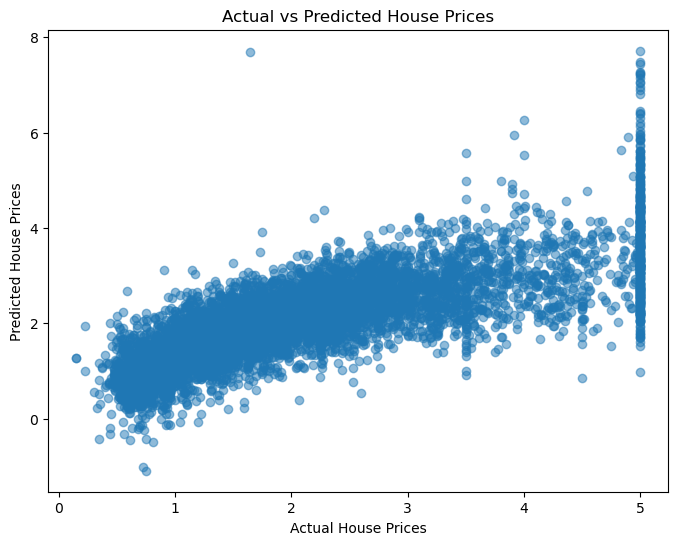

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
